# Figure 5. Optimization of peak calling in bulk chromatin accessibility data 

## Figure 5B

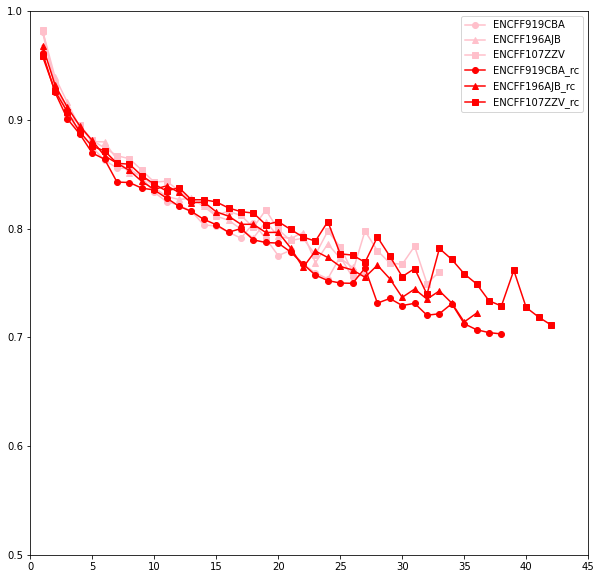

In [5]:
# for kidney samples

i = 0
plt.figure(figsize=(10, 10))

colors = ["pink", "pink", "pink", "red", "red", "red"]
markers = ["o", "^", "s", "o", "^", "s"]

last_auc_li = []
#for prefix in sample_dic['embryos_kidney']:
for el in ["ENCFF919CBA", "ENCFF196AJB", "ENCFF107ZZV", "ENCFF919CBA_rc", "ENCFF196AJB_rc", "ENCFF107ZZV_rc"]:
    #el = encode_df.loc[prefix, "acc_bam"]
    auc_list = []
    try:
        f = open("../analysis/encode_dnase_seq_bam/%s.gkmqc_all/%s_cvpred.auc_summary" % (el, el))
    except:
        continue
    for line in f.readlines():
        txt, num, val = line.split()
        if int(num) >= 5000:
            auc_list.append((int(txt.split('.')[8][3:]), float(val)))
    auc_list.sort(key=lambda x: x[0])
    last_auc = min(auc_list[-1][1], auc_list[-2][1])
    last_auc_li.append(last_auc)
    #if auc_list[-1][1] > 0.75:
    #if last_auc > 0.75:
    plt.plot(*zip(*auc_list), '-%s' % markers[i], c=colors[i], zorder=2, label=el)
    i += 1
    #elif auc_list[-1][1] > 0.7:
    #elif last_auc > 0.7:
        #plt.plot(*zip(*auc_list), '-o', c="lightgrey", zorder=1, label=el)
        
plt.legend()
plt.xlim(0, 45)
#plt.xlim(0, 45)
plt.ylim(0.5, 1.0)
plt.savefig("../output/Figure_5_1_aucsurve_kidney_rc.pdf")

## Figure 5C

In [ ]:
import pickle
f = open("../data/last_auc_dic.pkl", "rb")
last_auc_dic = pickle.load(f)
f.close()

f = open("../data/last_auc_rc_dic.pkl", "rb")
last_auc_rc_dic = pickle.load(f)
f.close()

# fc
acc_bam_trait_dic = {}
acc_bam_rc_targets = set(filter(lambda x: last_auc_dic[x] < 0.7, last_auc_dic.keys()))
for trait in traits_list:
    sumstat_file = gwas_df.loc[trait]['ldsc_sumstat_file']
    stype_list = gwas_df.loc[trait]['Comments and investigations'].split(',')
    for stype in stype_list:
        #if stype[:5] == 'cells': continue
        if stype == 'cells_tcells': continue
        acc_bam_list = set(map(lambda x: encode_df.loc[x, "acc_bam"], sample_dic[stype]))
        for acc_bam in set.intersection(acc_bam_list, acc_bam_rc_targets):
            if not acc_bam in acc_bam_trait_dic:
                acc_bam_trait_dic[acc_bam] = set()
            acc_bam_trait_dic[acc_bam].update(set([sumstat_file]))
    
# rc_only
acc_bam_rc_targets = set(filter(lambda x: last_auc_rc_dic[x] >= 0.7, last_auc_rc_dic.keys()))
for trait in traits_list:
    sumstat_file = gwas_df.loc[trait]['ldsc_sumstat_file']
    stype_list = gwas_df.loc[trait]['Comments and investigations'].split(',')
    for stype in stype_list:
        #if stype[:5] == 'cells': continue
        if stype == 'cells_tcells': continue
        acc_bam_list = set(map(lambda x: encode_df.loc[x, "acc_bam"], sample_dic[stype]))
        for acc_bam in set.intersection(acc_bam_list, acc_bam_rc_targets):
            if not acc_bam in acc_bam_trait_dic:
                acc_bam_trait_dic[acc_bam] = set()
            acc_bam_trait_dic[acc_bam].update(set([sumstat_file]))

# rc_after_fc_required
acc_bam_rc_targets = set(filter(lambda x: last_auc_rc_dic[x] < 0.7, last_auc_rc_dic.keys()))
for trait in traits_list:
    sumstat_file = gwas_df.loc[trait]['ldsc_sumstat_file']
    stype_list = gwas_df.loc[trait]['Comments and investigations'].split(',')
    for stype in stype_list:
        #if stype[:5] == 'cells': continue
        if stype == 'cells_tcells': continue
        acc_bam_list = set(map(lambda x: encode_df.loc[x, "acc_bam"], sample_dic[stype]))
        for acc_bam in set.intersection(acc_bam_list, acc_bam_rc_targets):
            if not acc_bam in acc_bam_trait_dic:
                acc_bam_trait_dic[acc_bam] = set()
            acc_bam_trait_dic[acc_bam].update(set([sumstat_file]))

In [9]:
ldsc_path = "/home/ch218391/PROJECTS/ldsc_pipeline/analysis"
sldsc_z_gkmqc_only_li = []
sldsc_prop_gkmqc_only_li = []

for acc_bam in acc_bam_trait_dic:
    pp = "%s_%s" % (acc_bam, acc_bam_prefix_dic[acc_bam])
    annot = "%s_1only.%s_2only.%s_both" % (pp, pp, pp)
    for sumstat_file in acc_bam_trait_dic[acc_bam]:
        try:
            # joint-analysis results
            data_list = open("%s/ldsc_baseLD22_%s.%s.results" % (ldsc_path, sumstat_file, annot)).readlines()[-2].split() # 2_only
            hprop_score = float(data_list[2]) # prop
            heriz_score = float(data_list[9]) # z-score
        except:
            print(acc_bam)
            continue
        sldsc_z_gkmqc_only_li.append(heriz_score)
        sldsc_prop_gkmqc_only_li.append(hprop_score)
        
        # print
        output = [acc_bam, sumstat_file, hprop_score, heriz_score]
        print('\t'.join(list(map(str, output))))

ENCFF581PCB	egfr_overall_te.sumstats.gz	0.006719601372699523	-0.8969609041153798
ENCFF581PCB	30670_irnt.imputed_v3.ldsc.both_sexes.tsv.gz	0.06623806803504684	1.1820815370184283
ENCFF581PCB	bun_overall_te.sumstats.gz	0.08579153473564985	1.3346207339511784
ENCFF581PCB	uacr_overall_te.sumstats.gz	0.03551153782748404	0.11576393467932033
ENCFF411CUP	egfr_overall_te.sumstats.gz	0.12589291744090067	2.4287618730986282
ENCFF411CUP	30670_irnt.imputed_v3.ldsc.both_sexes.tsv.gz	0.13482592472674917	2.7757900475841324
ENCFF411CUP	bun_overall_te.sumstats.gz	0.1688283665154197	2.138782117576795
ENCFF411CUP	uacr_overall_te.sumstats.gz	0.08413673827771387	1.4713527842757432
ENCFF748OVY	78_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz	0.14387868917673857	2.680197604622731
ENCFF214HKE	78_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz	0.12652846427892445	2.417673632256387
ENCFF791NEI	78_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz	0.09116402947974366	0.8832566449693914
ENCFF458BGJ	78_irnt.ldsc.imputed_v3.both_sexes.tsv.bgz	

0.7638483965014577

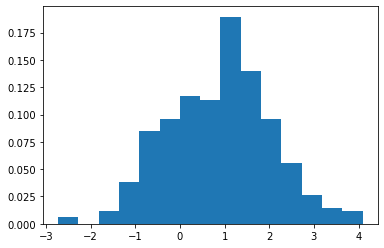

In [12]:
def hist_norm_weight(inputs):
    weights = list(map(lambda x: np.ones_like(x) / float(len(x)), inputs))
    return weights

hist([sldsc_z_gkmqc_only_li], bins=15, weights=hist_norm_weight([sldsc_z_gkmqc_only_li]))
len(list(filter(lambda x: x >0, sldsc_z_gkmqc_only_li)))/len(sldsc_z_gkmqc_only_li)

0.892128279883382

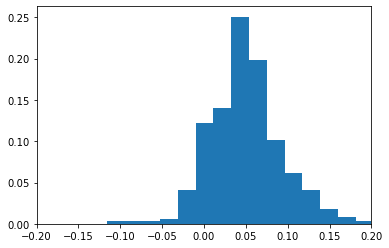

In [13]:
hist([sldsc_prop_gkmqc_only_li], bins=15, weights=hist_norm_weight([sldsc_prop_gkmqc_only_li]))
xlim(-0.2, 0.2)
len(list(filter(lambda x: x >0, sldsc_prop_gkmqc_only_li)))/len(sldsc_prop_gkmqc_only_li)

## Figure 5G

In [89]:
from functools import reduce
from random import sample

base_dir = "/home/ch218391/PROJECTS/gkmqc/analysis/encode_dnase_seq_bam"
target_stypes_sub = list(filter(lambda x: x[0] == 'e', target_stypes))

j_dist_dic = {}
for stype in target_stypes_sub:
    # case analysis - matched
    samples = sample_dic[stype]
    samples = list(filter(lambda x: prefix_mc_gkmqn_dic.get(x, 1.0) < 0.01, samples)) # if high-quality
    samples = list(map(lambda x: encode_df.loc[x, "acc_bam"], samples))
    samples = list(filter(lambda x: os.path.isfile("%s/%s_peaks.narrowPeak" % (base_dir, x)), samples)) # if file available
    samples_opt = set.intersection(set(map(lambda x: encode_df.loc[x, "acc_bam"], sample_dic[stype])), set(acc_bam_prefix_dic.keys()))
    samples_npt = set(samples) - set(acc_bam_prefix_dic.keys())
    
    # ctrl analysis - random
    if stype == 'embryos_kidney' or stype == 'embryos_renal':
        stype_l = set(['embryos_kidney', 'embryos_renal'])
    else:
        stype_l = set([stype])
        
    stype_rest = set(target_stypes_sub) - stype_l
    samples_tot = reduce(lambda x, y: x + y, map(lambda x: sample_dic[x], stype_rest), [])
    samples_tot = list(filter(lambda x: prefix_mc_gkmqn_dic.get(x, 1.0) < 0.01, samples_tot)) # if high-quality
    samples_tot = list(map(lambda x: encode_df.loc[x, "acc_bam"], samples_tot))
    samples_tot = list(filter(lambda x: os.path.isfile("%s/%s_peaks.narrowPeak" % (base_dir, x)), samples_tot)) # if file available
    samples_rnd = sample(samples_tot, len(samples_npt))
    
    j_def = []
    j_opt = []
    j_def_rnd = []
    j_opt_rnd = []
    
    for sample_o in samples_opt:
        sample_od_fi = "%s/%s_peaks.narrowPeak" % (base_dir, sample_o)
        if acc_bam_prefix_dic[sample_o][-5:] != 'upper':
            sample_op_fi = "%s/%s_rc.gkmqc_all/%s_rc_peaks.narrowPeak" % (base_dir, sample_o, sample_o)
        else:
            sample_op_fi = "%s/%s_rc.gkmqc_all/%s_rc_peaks_auc_upper.bed" % (base_dir, sample_o, sample_o)
        
        j_def_s = []
        j_opt_s = []
        #for sample_n in progressbar(samples_npt, prefix=sample_o + ' wtn-t'):
        for sample_n in samples_npt:
            sample_n_fi = "%s/%s_peaks.narrowPeak" % (base_dir, sample_n)
            r = subprocess.getoutput("bedtools jaccard -a %s -b %s | tail -n 1" % (sample_od_fi, sample_n_fi))
            jacc = float(r.split()[2])
            j_def_s.append(jacc)
            
            r = subprocess.getoutput("bedtools jaccard -a %s -b %s | tail -n 1" % (sample_op_fi, sample_n_fi))
            jacc = float(r.split()[2])
            j_opt_s.append(jacc)

        j_def_sr = []
        j_opt_sr = []
        #for sample_r in progressbar(samples_rnd, prefix=sample_o + ' btn-t'):
        for sample_r in samples_rnd:
            sample_r_fi = "%s/%s_peaks.narrowPeak" % (base_dir, sample_r)
            r = subprocess.getoutput("bedtools jaccard -a %s -b %s | tail -n 1" % (sample_od_fi, sample_r_fi))
            jacc = float(r.split()[2])
            j_def_sr.append(jacc)
            
            r = subprocess.getoutput("bedtools jaccard -a %s -b %s | tail -n 1" % (sample_op_fi, sample_r_fi))
            jacc = float(r.split()[2])
            j_opt_sr.append(jacc)
        
        output = [stype, sample_o, len(j_def_s), np.mean(j_def_s), np.mean(j_opt_s), np.mean(j_def_sr), np.mean(j_opt_sr)]
        print('\t'.join(list(map(str, output))))
        
        j_def += j_def_s
        j_opt += j_opt_s
        j_def_rnd += j_def_sr
        j_opt_rnd += j_opt_sr
    
    j_dist_dic[stype] = [j_def, j_opt, j_def_rnd, j_opt_rnd]
    #break

embryos_kidney	ENCFF107ZZV	5	0.4884028000000001	0.5340452	0.2746582	0.2748218
embryos_kidney	ENCFF919CBA	5	0.41089359999999997	0.48149800000000004	0.261949	0.26952940000000003
embryos_kidney	ENCFF196AJB	5	0.3923608	0.4632294	0.2636578	0.2730382
embryos_renal	ENCFF581PCB	2	0.5509795	0.5480955	0.29796900000000004	0.2624235
embryos_renal	ENCFF411CUP	2	0.5380685000000001	0.5229785	0.27970700000000004	0.243482
embryos_skmuscle	ENCFF748OVY	15	0.3572666666666667	0.4360343333333334	0.23596846666666665	0.26680659999999995
embryos_skmuscle	ENCFF262FMO	15	0.4319776666666667	0.4543247333333334	0.2564568	0.26768
embryos_skmuscle	ENCFF791NEI	15	0.4714703333333333	0.4829350666666666	0.28440946666666667	0.2884437333333333
embryos_skmuscle	ENCFF024CTB	15	0.5168758666666667	0.5143689333333332	0.29166613333333336	0.2914797333333334
embryos_skmuscle	ENCFF838ACP	15	0.4951139333333333	0.4926661333333333	0.27392106666666666	0.2747944
embryos_skmuscle	ENCFF992HOZ	15	0.4991413333333334	0.5080355333333333	0.280

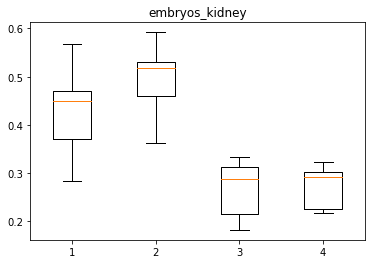

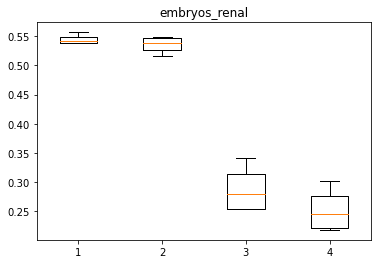

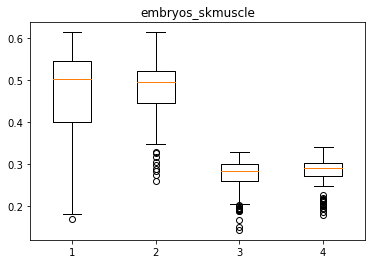

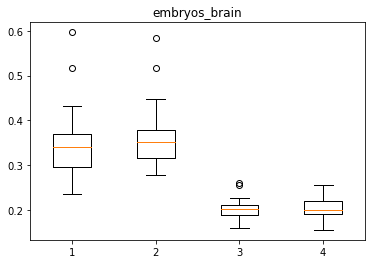

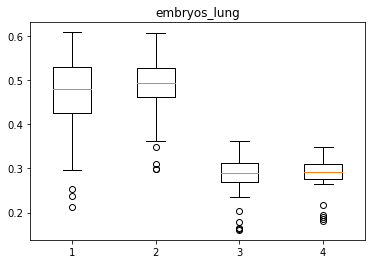

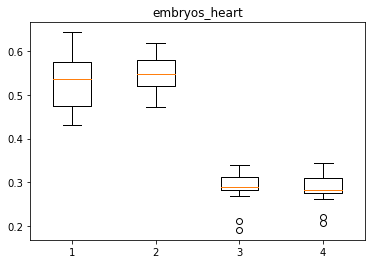

In [91]:
for el in j_dist_dic:
    plt.title(el)
    plt.boxplot(j_dist_dic[el])
    plt.show()

## Figure 5H

In [92]:
djacc_wtn_l = []
djacc_btn_l = []
f = open("../data/jacc_comp_peak_opt.txt")
for line in f.readlines():
    line_tab = line.split()
    djacc_wtn = float(line_tab[4]) - float(line_tab[3])
    djacc_btn = float(line_tab[6]) - float(line_tab[5])
    djacc_wtn_l.append(djacc_wtn)
    djacc_btn_l.append(djacc_btn)
f.close()

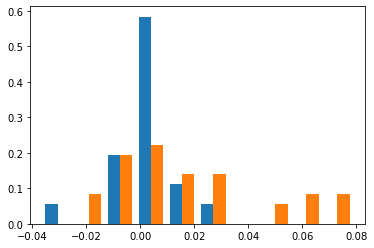

In [101]:
hist([djacc_btn_l, djacc_wtn_l], weights=hist_norm_weight([djacc_btn_l, djacc_wtn_l]))
plt.savefig("../output/all_over_samples_over_coef_improv.pdf")

## Figure S6A

embryos_kidney (-0.43520142687606694, 0.011366409047507532)
embryos_renal (-0.2451114156849622, 0.4195861069215508)
embryos_skmuscle (-0.6368270446674832, 2.564324672942926e-06)
embryos_brain (-0.10409950384553246, 0.701226102688052)
embryos_lung (-0.5604148759518957, 0.00025300350004418853)
embryos_heart (-0.4148976774366867, 0.049001065716854204)
cells_cmp (-0.453318970509471, 0.13885720991545833)
cells_hmp (0.10253110731426782, 0.6670900781794228)


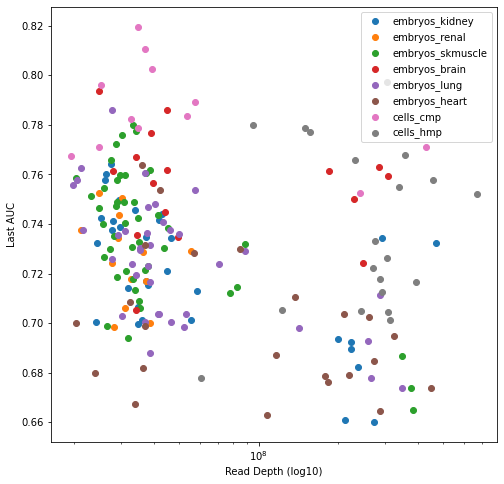

In [17]:
#scatter(x, y)
#pearsonr(x, y)
plt.figure(figsize=(8, 8))
for stype in target_stypes:
    prefix_list = list(filter(lambda x: x in last_auc_dic, sample_dic[stype]))
    x = list(map(lambda x: prefix_readc_dic[x], prefix_list))
    y = list(map(lambda x: last_auc_dic[x], prefix_list))
    plt.scatter(x, y, label=stype)
    #plt.hist(y, label=stype)
    print(stype, pearsonr(x, y))
plt.legend()
plt.ylabel("Last AUC")
plt.xlabel("Read Depth (log10)")
plt.xscale("log", basex=10)
plt.savefig("../output/Figure_S6a.pdf")

## Figure S6B

58


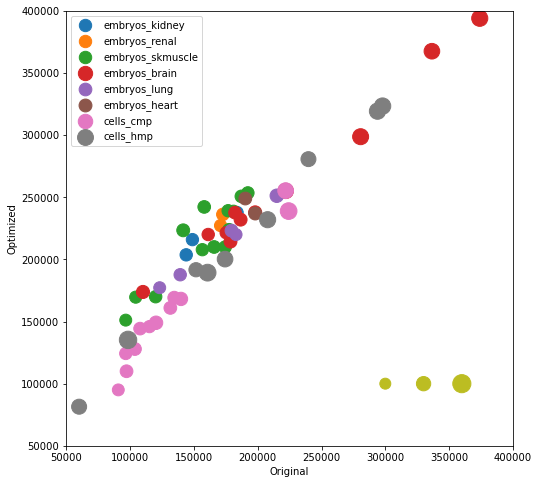

In [39]:
opt_target = list(filter(lambda x: last_auc_dic[x] >= 0.75, last_auc_dic.keys()))

plt.figure(figsize=(8, 8))
i = 0
sfactor = 0.05
x_all = []
y_all = []
for stype in target_stypes:
    prefix_list = list(filter(lambda x: x in opt_target, sample_dic[stype]))
    x = [] # original
    y = [] # optimized
    depth = []
    for prefix in prefix_list:
        acc_bam = encode_df.loc[prefix]["acc_bam"]
        fi_peaks_ori = "../analysis/encode_dnase_seq_bam/%s.gkmqc/%s.e300.bed" % (acc_bam, acc_bam)
        flag = False
        try:
            fi_peaks_opt = "../analysis/encode_dnase_seq_bam/%s_rc.gkmqc_all/%s_rc_peaks_auc_upper.bed" % (acc_bam, acc_bam)
            y.append(len(open(fi_peaks_opt).readlines()))
            flag = True
        except:
            try:
                fi_peaks_opt = "../analysis/encode_dnase_seq_bam/%s_rc.gkmqc_all/%s_rc.e300.bed" % (acc_bam, acc_bam)
                y.append(len(open(fi_peaks_opt).readlines()))
                flag = True
            except:
                flag = False
        
        if flag:
            x.append(len(open(fi_peaks_ori).readlines()))
            depth.append(sfactor * np.log10(prefix_readc_dic[prefix]) ** 4)
            i += 1
    x_all += x
    y_all += y
    plt.scatter(x, y, s=depth, label=stype)
plt.legend()
plt.xlabel("Original")
plt.ylabel("Optimized")
plt.xlim(50000, 400000)
plt.ylim(50000, 400000)
scatter([300000, 330000, 360000], [100000, 100000, 100000], s=[7 ** 4 * sfactor, 8 ** 4 * sfactor, 9 ** 4 * sfactor])
plt.savefig("../output/Figure_S6b.pdf")
print(i)

## Figure S6C

In [6]:
### Integrated fc, rc_fc
acc_bam_fc =    set(filter(lambda x: last_auc_dic[x] < 0.7, last_auc_dic.keys())) # fc-only
acc_bam_rc =    set(filter(lambda x: last_auc_rc_dic[x] >= 0.7, last_auc_rc_dic.keys())) # rc-only
acc_bam_rc_fc = set(filter(lambda x: last_auc_rc_dic[x] < 0.7, last_auc_rc_dic.keys())) # rc-fc again

acc_bam_prefix_dic = {}
#for acc_bam in acc_bam_fc:
#    acc_bam_prefix_dic[acc_bam] = "%s_auc_upper" % acc_bam
for acc_bam in acc_bam_rc:
    acc_bam_prefix_dic[acc_bam] = "%s_rc" % acc_bam
for acc_bam in acc_bam_rc_fc:
    acc_bam_prefix_dic[acc_bam] = "%s_rc_auc_upper" % acc_bam
    
# rc_after_fc_required
acc_bam_trait_dic = {}
acc_bam_rc_targets = set(acc_bam_prefix_dic.keys())
for trait in traits_list:
    sumstat_file = gwas_df.loc[trait]['ldsc_sumstat_file']
    stype_list = gwas_df.loc[trait]['Comments and investigations'].split(',')
    for stype in stype_list:
        #if stype[:5] == 'cells': continue
        if stype == 'cells_tcells': continue
        acc_bam_list = set(map(lambda x: encode_df.loc[x, "acc_bam"], sample_dic[stype]))
        for acc_bam in set.intersection(acc_bam_list, acc_bam_rc_targets):
            if not acc_bam in acc_bam_trait_dic:
                acc_bam_trait_dic[acc_bam] = set()
            acc_bam_trait_dic[acc_bam].update(set([sumstat_file]))

sldsc_z_default_li = []
sldsc_z_gkmqc_li = []
sldsc_prop_default_li = []
sldsc_prop_gkmqc_li = []

ldsc_path = "/home/ch218391/PROJECTS/ldsc_pipeline/analysis"

prefix_sldsc_default_dic = {}
prefix_sldsc_gkmqc_dic = {}

for acc_bam in acc_bam_trait_dic:
    prefix = acc_bam_prefix_dic[acc_bam]
    
    prefix_o = prefix.split("_")[0]
    prefix_sldsc_default_dic[prefix_o] = []
    prefix_sldsc_gkmqc_dic[prefix_o] = []
    for sumstat_file in acc_bam_trait_dic[acc_bam]:
        try:
            # original
            data_list1 = open("%s/ldsc_baseLD22.%s.%s.results" % (ldsc_path, acc_bam, sumstat_file)).readlines()[-1].split()
            hprop_score1 = float(data_list1[2]) # prop
            heriz_score1 = float(data_list1[9]) # z-score
            
            # gkmQC-optimized
            data_list2 = open("%s/ldsc_baseLD22.%s.%s.results" % (ldsc_path, prefix, sumstat_file)).readlines()[-1].split()
            hprop_score2 = float(data_list2[2]) # prop
            heriz_score2 = float(data_list2[9]) # z-score
        except:
            print(acc_bam)
            continue
        
        sldsc_z_default_li.append(heriz_score1)
        sldsc_z_gkmqc_li.append(heriz_score2)
        prefix_sldsc_default_dic[prefix_o].append(heriz_score1)
        prefix_sldsc_gkmqc_dic[prefix_o].append(heriz_score2)
        
        sldsc_prop_default_li.append(hprop_score1)
        sldsc_prop_gkmqc_li.append(hprop_score2)
        
        # print
        output = [acc_bam, sumstat_file, hprop_score1, heriz_score1, hprop_score2, heriz_score2]
        print('\t'.join(list(map(str, output))))

ENCFF581PCB	egfr_overall_te.sumstats.gz	0.46276354401858455	3.6759280874751323	0.4772677700765937	2.296579168669166
ENCFF581PCB	30670_irnt.imputed_v3.ldsc.both_sexes.tsv.gz	0.4785621104164409	3.3134131048968496	0.5372919189039983	3.8350562993857045
ENCFF581PCB	bun_overall_te.sumstats.gz	0.5202121705856049	3.585740875933324	0.5924831840238304	3.7354903321322785
ENCFF581PCB	uacr_overall_te.sumstats.gz	0.39802261587605736	3.364861531540769	0.43061873523980676	2.9996814973678694
ENCFF411CUP	egfr_overall_te.sumstats.gz	0.3583662016049439	0.8884113804961555	0.4693432889411615	1.9574746961421703
ENCFF411CUP	30670_irnt.imputed_v3.ldsc.both_sexes.tsv.gz	0.40570500360119033	1.7692898327296367	0.5195025860949596	2.7449239274458073
ENCFF411CUP	bun_overall_te.sumstats.gz	0.386644032983817	1.1330505636880464	0.5228366110333424	2.045005259366948
ENCFF411CUP	uacr_overall_te.sumstats.gz	0.3495308244996982	2.00064670438071	0.4222200429144268	2.3879742468488634
ENCFF748OVY	78_irnt.ldsc.imputed_v3.both_se

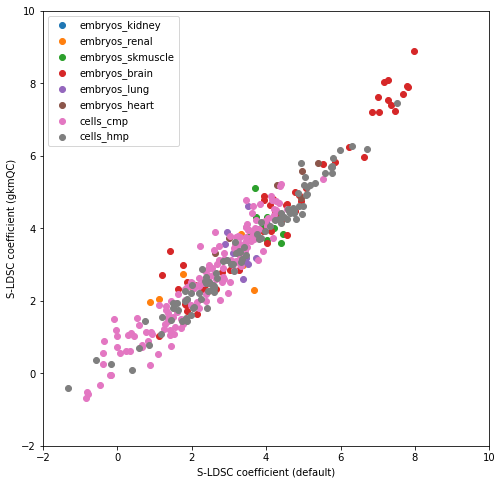

In [33]:
plt.figure(figsize=(8, 8))
for stype in target_stypes:
    prefix_list = sample_dic[stype]
    li_x = []
    li_y = []
    for x in list(map(lambda x: prefix_sldsc_default_dic.get(encode_df.loc[x]['acc_bam'], []), prefix_list)):
        li_x += x
    for y in list(map(lambda x: prefix_sldsc_gkmqc_dic.get(encode_df.loc[x]['acc_bam'], []), prefix_list)):
        li_y += y
    plt.scatter(li_x, li_y, label=stype)
plt.legend()
plt.ylabel("S-LDSC coefficient (gkmQC)")
plt.xlabel("S-LDSC coefficient (default)")
plt.xlim(-2, 10)
plt.ylim(-2, 10)
plt.savefig("../output/Figure_S7c.pdf")